# Import packages

In [2]:
import pandas as pd
import numpy as np


In [3]:
import seaborn
import seaborn as sns

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('seaborn-white')

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('max.columns', 200)

In [5]:
import missingno as msno

In [6]:
sns.set_palette('PiYG')
sns.set_style('whitegrid',
              {'axes.facecolor': '1',
               'axes.edgecolor': '0.8',
               'axes.labelcolor': '0.2',
               'text.color': '0.2',
               'xtick.color': '0.2',
               'ytick.color': '0.2',
               'grid.color': '0.7',
               'figure.facecolor': '0.95',
               'figure.figsize': (10, 6),
               'figure.dpi': 300.0,
              }
             )

sns.set_context('notebook', font_scale=1.3)

# Lists

In [ ]:
# random_state=12345678

In [7]:
# list of formations
formation_list = ['form_A', 'form_B', 'form_C', 'form_D', 'form_E', 'form_F',
       'form_G', 'form_H', 'form_I', 'form_J', 'form_K']

In [8]:
# list of wells
wells = ['well_Q', 'well_W', 'well_E', 'well_R', 'well_T']

In [9]:
# список лоя литологии
litho_list = [
         'LM', 'LM_DLM', 'DLM', 'DLM_C', 'E_GA', 'E_KMN', 'EXTR', 'SHC',
       'SHS', 'SILT', 'UNS', 'SND'
]

In [10]:
# for lithology visualization
for_lithology = ['LM', 'LM_DLM', 'DLM', 'DLM_C', 'E_GA', 'E_KMN', 'EXTR', 'SHC',
       'SHS', 'SILT', 'UNS', 'SND', 'Formation'] 

## colors for lythology

In [12]:
# for colors generation
def plot_colors(colors):
    from matplotlib.patches import Rectangle
    fig,ax = plt.subplots(1, len(colors), figsize=(10,0.4), dpi=300)
    for i, color in enumerate(colors):
        rect = Rectangle((0,0),1,1,linewidth=1,edgecolor='grey',facecolor=color)
        ax[i].add_patch(rect)
        ax[i].set_axis_off()
    plt.show()

['#bf4740', '#bf9440', '#9ebf40', '#52bf40', '#40bf7a', '#40b8bf', '#406bbf', '#6140bf', '#ad40bf', '#bf4085']


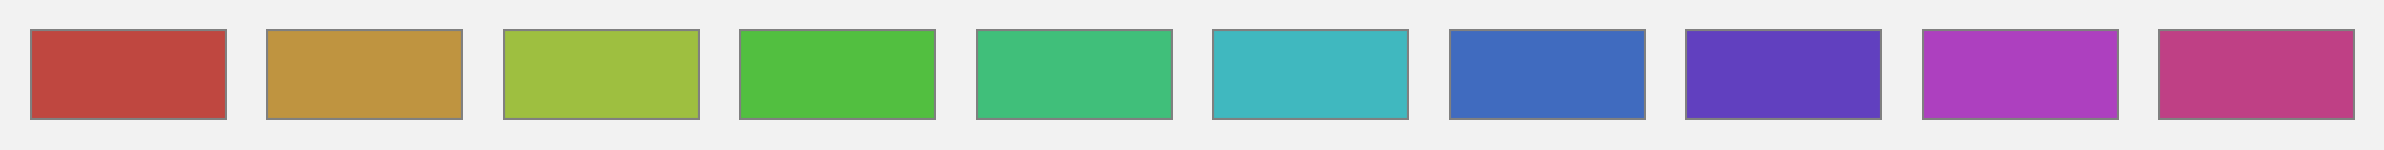

In [15]:
# colors depend on l and s 
colors = seaborn.hls_palette(10, l=.5, s=.5).as_hex()
print(colors)
plot_colors(colors)

['#f5a8a3', '#f5c1a3', '#f5d9a3', '#f5f2a3', '#e0f5a3', '#c7f5a3', '#aff5a3', '#a3f5b0', '#a3f5c9', '#a3f5e1', '#a3f0f5', '#a3d7f5', '#a3bff5', '#a3a6f5', '#b8a3f5', '#d1a3f5', '#e9a3f5', '#f5a3e8', '#f5a3cf', '#f5a3b7']


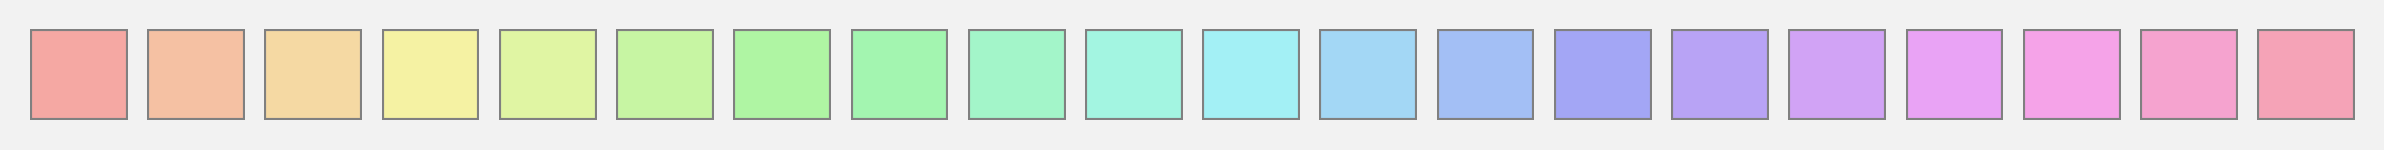

In [16]:
# more colors
colors = seaborn.hls_palette(20, l=.8, s=.8).as_hex()
print(colors)
plot_colors(colors)

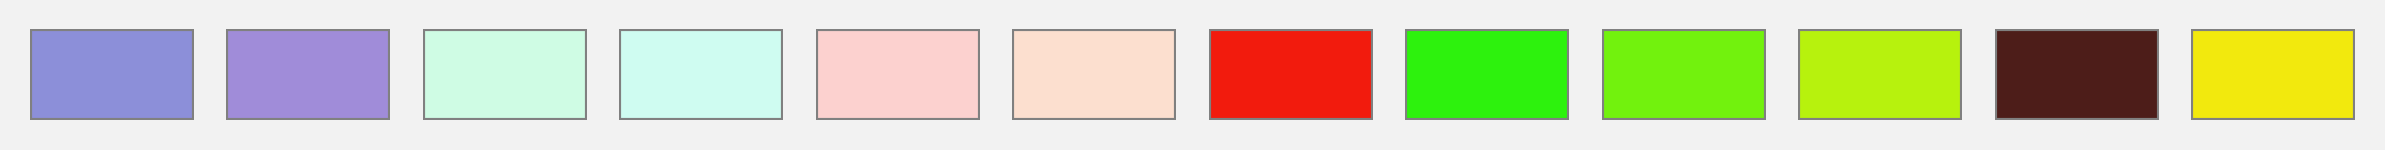

In [17]:
# selected colors

litho_colors = [
                '#8c8fd9', #Limestone_general
                '#a08cd9', #Limestone_dolomitic
                '#cffce4', #Dolomite
                '#cffcf1', #Dolomite_calcareous
                '#fcd1cf', #Evaporite_Gypsum_Anhydrite
                '#fcdfcf', #Evaporite_Salts_Na_K_Mg
                '#f21b0d', #Rock_extrusive
                '#2df20d', #Shale_clay
                '#72f20d', #Shale_silty 
                '#b7f20d', #Siltstone 
                '#4d1d19', #unassigned
                '#f2e90d'  #sand_all
                ]
plot_colors(litho_colors)

In [19]:
section[for_lithology]

,LM,LM_DLM,DLM,DLM_C,E_GA,E_KMN,EXTR,SHC,SHS,SILT,UNS,SND,Formation
0,0.49,0.0,0.0,38.77,55.00,0.0,0.0,5.74,0.0,0.0,0.0,0.0,form_A
1,1.00,0.0,0.0,37.50,55.00,0.0,0.0,6.50,0.0,0.0,0.0,0.0,form_A
2,1.51,0.0,0.0,36.22,55.00,0.0,0.0,7.26,0.0,0.0,0.0,0.0,form_A
3,2.02,0.0,0.0,34.96,55.00,0.0,0.0,8.02,0.0,0.0,0.0,0.0,form_A
4,2.52,0.0,0.0,33.69,55.00,0.0,0.0,8.78,0.0,0.0,0.0,0.0,form_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62302,0.00,0.0,0.0,0.00,83.53,0.0,0.0,16.47,0.0,0.0,0.0,0.0,form_K
62303,0.00,0.0,0.0,0.00,85.05,0.0,0.0,14.95,0.0,0.0,0.0,0.0,form_K
62304,0.00,0.0,0.0,0.00,86.58,0.0,0.0,13.42,0.0,0.0,0.0,0.0,form_K
62305,0.00,0.0,0.0,0.00,88.10,0.0,0.0,11.90,0.0,0.0,0.0,0.0,form_K


## pie diagram

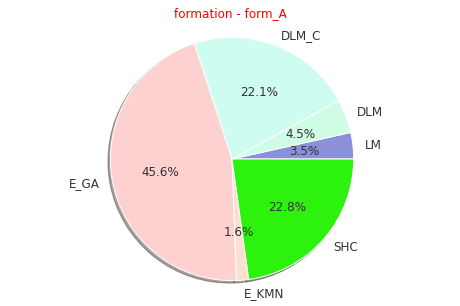

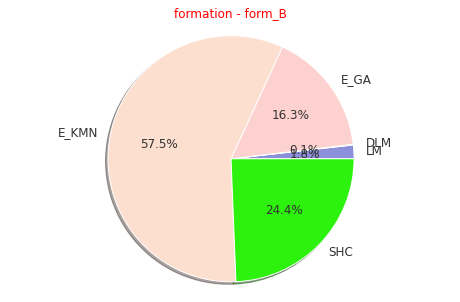

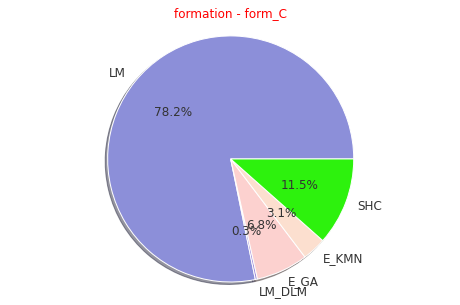

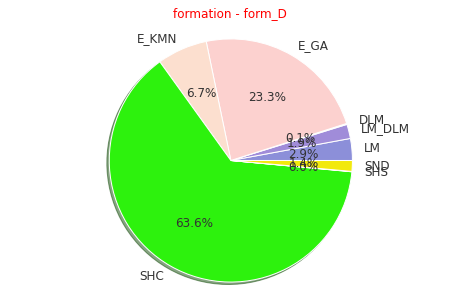

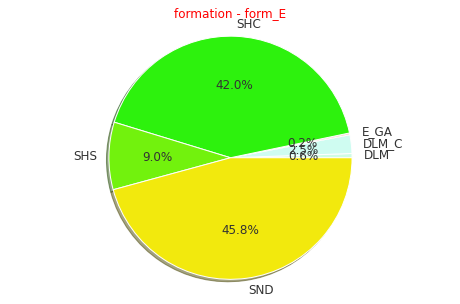

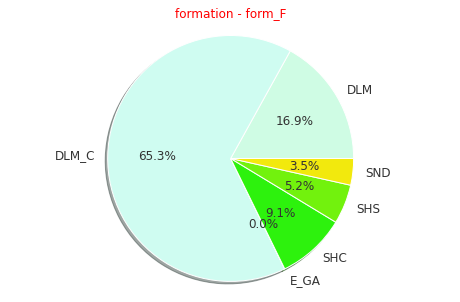

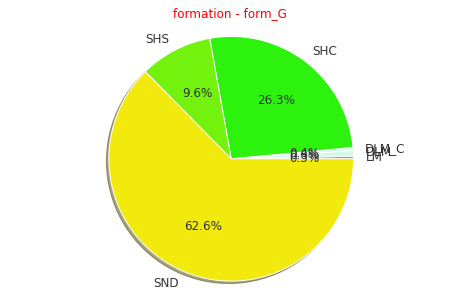

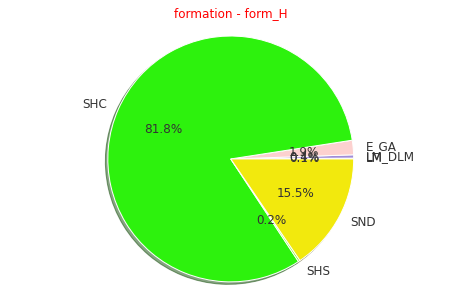

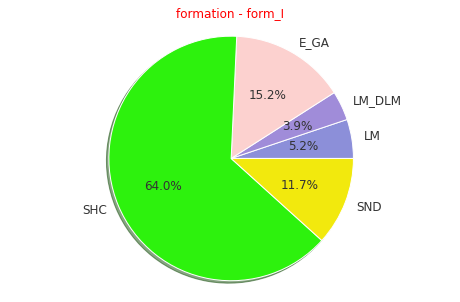

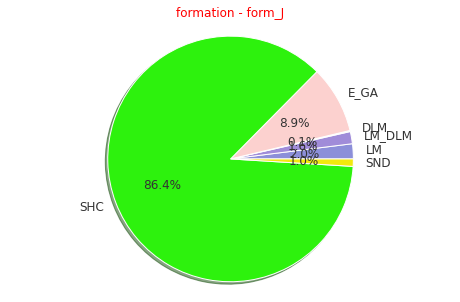

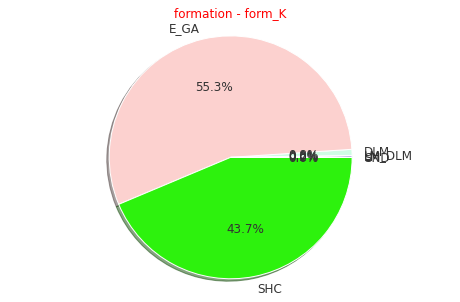

In [21]:
df = section[for_lithology]

for formation in formation_list:
  temp_1 = df.query('Formation == @formation') # slice by formation
  
  # remove columns with 0 % of litholory 
  for litho in litho_list:
    summa = temp_1[litho].sum()
    if summa == 0:
      temp_1 = temp_1.drop(litho, axis='columns')
  
  # make list with the rest columns
  temp_2 = temp_1.columns.tolist()  
  temp_2.remove('Formation')       

  pie_diagram = pd.DataFrame()

  for i,litho in enumerate(temp_2):
    pie_diagram.loc[i,'lithology'] = litho
    pie_diagram.loc[i,'values'] = temp_1[litho].sum()

    # fill table with corresponding color
    if litho == 'LM':
      pie_diagram.loc[i,'color'] = '#8c8fd9'
    if litho == 'LM_DLM':
      pie_diagram.loc[i,'color'] = '#a08cd9'
    if litho == 'DLM':
      pie_diagram.loc[i,'color'] = '#cffce4'
    if litho == 'DLM_C':
      pie_diagram.loc[i,'color'] = '#cffcf1'
    if litho == 'E_GA':
      pie_diagram.loc[i,'color'] = '#fcd1cf'
    if litho == 'E_KMN':
      pie_diagram.loc[i,'color'] = '#fcdfcf'
    if litho == 'EXTR':
      pie_diagram.loc[i,'color'] = '#f21b0d'
    if litho == 'SHC':
      pie_diagram.loc[i,'color'] = '#2df20d'
    if litho == 'SHS':
      pie_diagram.loc[i,'color'] = '#72f20d'
    if litho == 'SILT':
      pie_diagram.loc[i,'color'] = '#b7f20d'
    if litho == 'UNS':
      pie_diagram.loc[i,'color'] = '#4d1d19'
    if litho == 'SND':
      pie_diagram.loc[i,'color'] = '#f2e90d'    

  # make list in order to use it in plot and get the same colors for same lithology
  colors = pie_diagram['color'].tolist() 
  labels = pie_diagram["lithology"]
  values = pie_diagram["values"]
  
  fig1, ax1 = plt.subplots(facecolor='white')
  ax1.pie(values, labels=labels, colors = colors, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 12})
  fig = plt.gcf()
  fig.set_size_inches(8,5)
  ax1.axis('equal') 
  plt.title(f'formation - {formation}', fontsize = 12, color = 'red') 
  plt.show()